# Lab 9
**Name** : AKSHAY KEKUDA

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
from sklearn.cluster import AgglomerativeClustering

In [102]:
df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)

In [103]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [104]:
df[7].value_counts()

3    70
2    70
1    70
Name: 7, dtype: int64

In [105]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

The dataset has no missing values


In [106]:
scaler = StandardScaler()

In [107]:
temp_df= scaler.fit_transform(df.iloc[:,0:7])
df_scaled = df.copy(deep = True)
df_scaled.iloc[:, 0:7] = temp_df

In [108]:
df_scaled

,0,1,2,3,4,5,6,7
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,3
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,3
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,3
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,3


The data is now scaled to -1 and 1

### Dimensionality Reduction

In [109]:
X_scaled = df_scaled.iloc[:, 0:7]
y_true = df_scaled[7]

In [110]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [111]:
colnames = ['PC{}'.format(c+1) for c in range(pca.n_components_)]
pc = pd.DataFrame(pca.components_.T, columns=colnames)
pc['col'] = df.columns[0:7]
pc

,PC1,PC2,PC3,PC4,col
0,0.444474,-0.026564,0.025871,0.193640,0
1,0.441571,-0.084003,-0.059839,0.295457,1
2,0.277017,0.529151,0.629692,-0.332816,2
3,0.423563,-0.205975,-0.211880,0.263407,3
4,0.432819,0.116690,0.216483,0.199630,4
5,-0.118692,-0.716882,0.679506,0.092465,5
6,0.387161,-0.377193,-0.213897,-0.804150,6


In [112]:
pca.explained_variance_ratio_

array([0.71874303, 0.17108184, 0.09685763, 0.00976635])

In [113]:
X_pca = pca.transform(X_scaled)
X_pca[:5]

array([[ 0.31704705,  0.78366902, -0.63101001,  0.41684594],
       [-0.00338618,  1.91321367, -0.66975446,  0.43307058],
       [-0.45944334,  1.90722525,  0.93248882,  0.11129161],
       [-0.59193565,  1.93106922,  0.49931092,  0.2289766 ],
       [ 1.10291005,  2.06809003,  0.05670541,  0.14242065]])

As can be seen from the explained variance ratio output, 3 components would be suffiecient to represent the data.

In [114]:
X_pca = X_pca[:,0:3]

In [115]:
X_pca.shape

(210, 3)

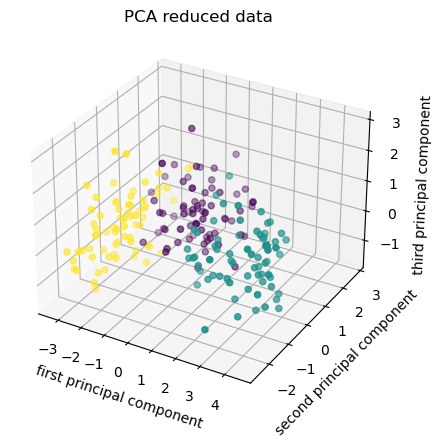

In [116]:
# Let's plot the data points on the first three principal components
fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_subplot(projection = '3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_true)

ax.set_title('PCA reduced data')
ax.set_xlabel('first principal component')
ax.set_ylabel('second principal component')
ax.set_zlabel("third principal component")
plt.show()

## Part 1

In [117]:
gm = GaussianMixture(n_components=3)
gm.fit(X_pca)

GaussianMixture(n_components=3)

In [118]:
y_gm = gm.predict(X_pca)

In [119]:
ix = y_gm.argsort()
X_sorted = X_pca[ix]
y_sorted = y_gm[ix]

dist_mat_sorted = squareform(pdist(X_sorted))
actual_csm = 1. - dist_mat_sorted / np.max(dist_mat_sorted)

In [120]:
y_gm

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
pd.Series(y_gm).value_counts()

1    76
0    71
2    63
dtype: int64

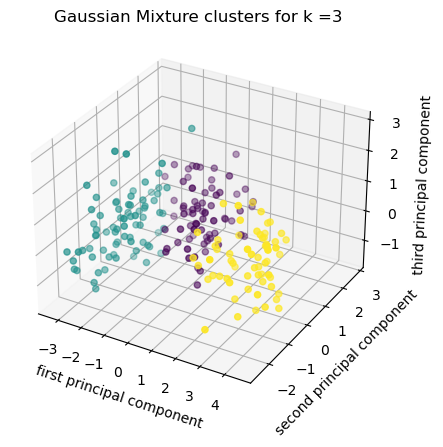

In [122]:
# Let's plot the data points on the first two principal components
fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_subplot(projection = '3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_gm )

ax.set_title('Gaussian Mixture clusters for k =3')
ax.set_xlabel('first principal component')
ax.set_ylabel('second principal component')
ax.set_zlabel("third principal component")
plt.show()

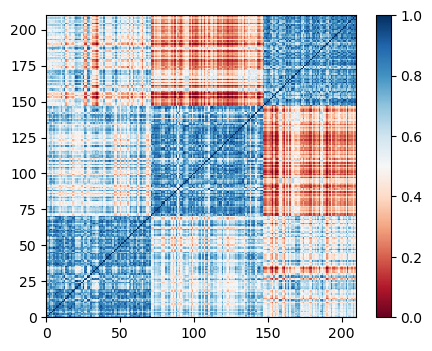

In [123]:
fig = plt.figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(actual_csm, cmap='RdBu')
fig.colorbar(pcm, ax=ax)
plt.show()

In [124]:
y_sorted = y_gm[ix] # put found/predicted clusters in the same order
ideal_csm = np.array([[1 if j == i else 0 for j in y_sorted] for i in y_sorted])

In [125]:
corr, pvalue = pearsonr(actual_csm.flatten(), ideal_csm.flatten())
print('Corr: {:0.4f} (p={:0.4f})'.format(corr,pvalue))

Corr: 0.6432 (p=0.0000)


In [126]:
def unsupervised_ce(num_clusters, figure, axes):
    gm = GaussianMixture(n_components=num_clusters)
    y_gm = gm.fit_predict(X_pca)
    
    ix = y_gm.argsort()
    X_sorted = X_pca[ix]
    y_sorted = y_gm[ix]
    
    dist_mat_sorted = squareform(pdist(X_sorted))
    actual_csm = 1. - dist_mat_sorted / np.max(dist_mat_sorted)
    
    i = (num_clusters -2)//2
    j = (num_clusters -2)%2
    pcm = axes[i][j].pcolormesh(actual_csm, cmap='RdBu')
    axes[i][j].set_title("n components = {}".format(num_clusters))
    plt.colorbar(pcm, ax=axes[i, j])    
    
    ideal_csm = np.array([[1 if j == i else 0 for j in y_sorted] for i in y_sorted])
    corr, pvalue = pearsonr(actual_csm.flatten(), ideal_csm.flatten())
    print('Corr: {:0.4f} (p={:0.4f}) for n_components = {}'.format(corr,pvalue,num_clusters))

Corr: 0.6682 (p=0.0000) for n_components = 2
Corr: 0.6394 (p=0.0000) for n_components = 3
Corr: 0.5993 (p=0.0000) for n_components = 4
Corr: 0.5681 (p=0.0000) for n_components = 5
Corr: 0.5415 (p=0.0000) for n_components = 6
Corr: 0.5128 (p=0.0000) for n_components = 7


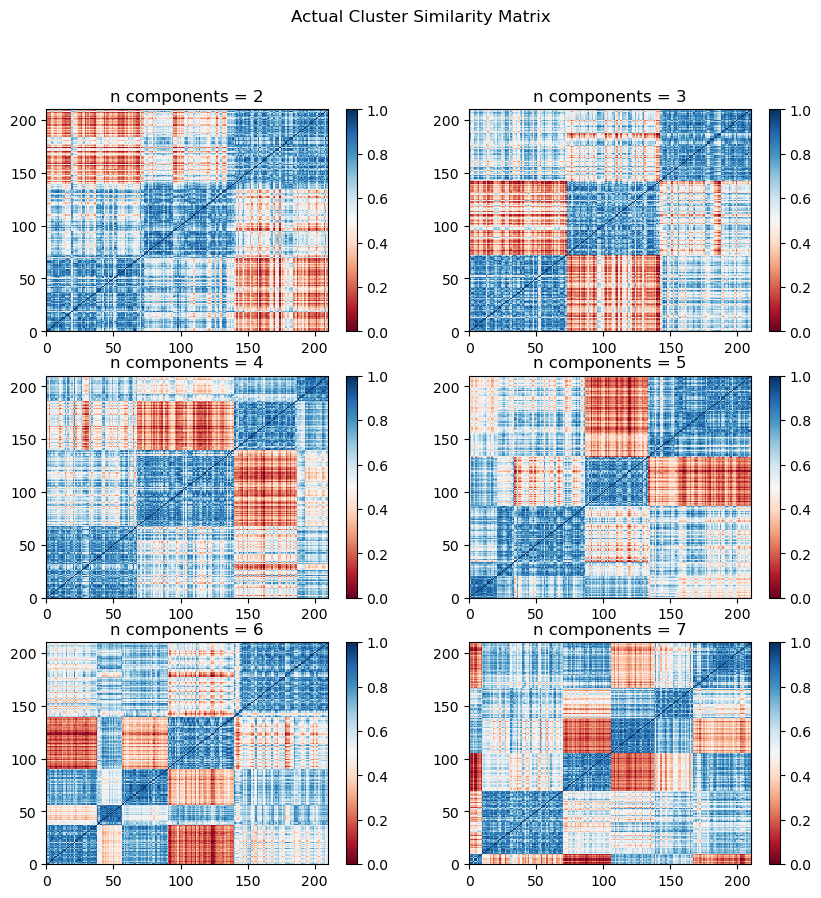

In [127]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10), dpi=100)
for k in range(2, 8):
    unsupervised_ce(k, figure, axes)
figure.suptitle("Actual Cluster Similarity Matrix")
plt.show()

The values of the correlation coefficient for all six clusterings are as below:

|Number of Clusters|Pearson's correlation Coefficient|
|:-:|:-:|
|2|0.6684|
|3|0.6394|
|4|0.5826|
|5|0.5443|
|6|0.4983|
|7|0.5200|

As seen from the above table, k = 2 has the highest correlation coefficient. This is surprising as the true number of clusters in the data are given as three. But closely observing the actual similarity matrix for k = 3, we see that 2 of the clusters are not well separated as they need to be. Hence we see that k =2 has the highest correlation coefficient as the true clusters by themselves may not be well separated.

## Part 2

In [128]:
def supervised_ce(X, y_cluster,y_true, figure, axes):
    
    ix = y_cluster.argsort()
    X_sorted = X[ix]
    y_sorted = y_cluster[ix]

    dist_mat_sorted = squareform(pdist(X_sorted))
    actual_csm = 1. - dist_mat_sorted / np.max(dist_mat_sorted)
    
    pcm = axes.pcolormesh(actual_csm, cmap='RdBu')
    plt.colorbar(pcm, ax=axes)    
    ideal_csm = np.array([[1 if j == i else 0 for j in y_sorted] for i in y_sorted])
    
    ytrue_sorted = y_true[ix] # reuse same index order
    class_csm = np.array([[1 if j == i else 0 for j in ytrue_sorted] for i in ytrue_sorted])
    
    corr, pvalue = pearsonr(class_csm.flatten(), ideal_csm.flatten())
    print('Corr: {:0.4f} (p={:0.4f})'.format(corr,pvalue))

### Gaussian Mixture Model

Corr: 0.7069 (p=0.0000)


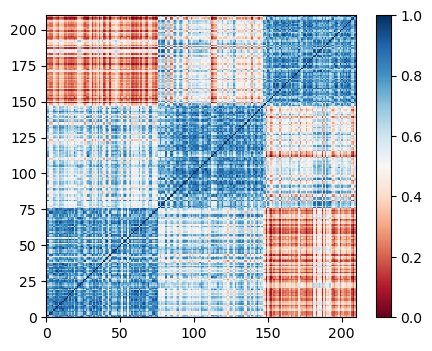

In [129]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=100)
gm = GaussianMixture(n_components=3)
y_gm = gm.fit_predict(X_pca)
supervised_ce(X_pca, y_gm, y_true, figure, axes)

### K-means

Corr: 0.7871 (p=0.0000)


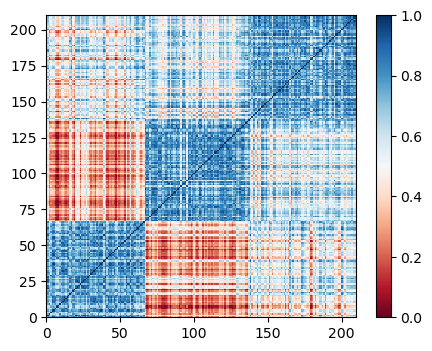

In [130]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=100)
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X_pca)
supervised_ce(X_pca, y_kmeans, y_true, figure, axes)

### Agglomerative Hierarchical Clustering

Corr: 0.6174 (p=0.0000)


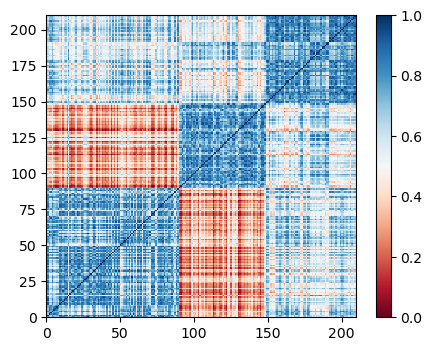

In [131]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=100)
Aggclus = AgglomerativeClustering(linkage='complete', n_clusters=3)
y_Aggclus = Aggclus.fit_predict(X_pca)
supervised_ce(X_pca, y_Aggclus, y_true, figure, axes)

The values of the correlation coefficient for the three clustering algorithms are as below:

|Clustering Algorithm|Pearson's correlation Coefficient|
|:-:|:-:|
|Gaussain Mixture Model|0.7069|
|k-means|0.7871|
|Agglomerative Hierarchical Clustering|0.6174|

As seen from the above table, k-means has the highest correlation coefficient. Thus k-means did a better job in finding the true clusters comapared to the other algorithms.